<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [250]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [251]:
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [252]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [253]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [254]:
education_pattern = '(высшее|неоконченное высшее|среднее специальное|среднее)'
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(
    lambda x:
    re.findall(education_pattern, x, flags=re.IGNORECASE)[0]
    if re.search(education_pattern, x, flags=re.IGNORECASE)
    else None
).astype('category')
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [255]:
sex_pattern = '(Мужчина|Женщина)'
hh_data['Пол'] = hh_data['Пол, возраст'].apply(
    lambda x:
    re.findall(sex_pattern, x, flags=re.IGNORECASE)[0]
    if re.search(sex_pattern, x, flags=re.IGNORECASE)
    else None
).apply(lambda x: 'M' if x == 'Мужчина' else 'Ж').astype('category')

age_pattern = r"(\d+)\s?(лет|год)"
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(
    lambda x:
    int(list(re.findall(age_pattern, x, flags=re.IGNORECASE)[0])[0])
    if re.search(age_pattern, x, flags=re.IGNORECASE)
    else None
)
hh_data = hh_data.drop('Пол, возраст', axis=1)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [256]:
def experience_to_month(x):
    if type(x) is str:
        experience_pattern = r"Опыт работы (\d+) (года?|лет) (\d+) месяц"
        if re.match(experience_pattern, x, flags=re.IGNORECASE):
            match = list(re.findall(experience_pattern, x, flags=re.IGNORECASE)[0])
            return int(match[0]) * 12 + int(match[2])

        experience_pattern = r"Опыт работы (\d+) (года?|лет)"
        if re.match(experience_pattern, x, flags=re.IGNORECASE):
            match = list(re.findall(experience_pattern, x, flags=re.IGNORECASE)[0])
            return int(match[0]) * 12

        experience_pattern = r"Опыт работы (\d+) месяц"
        if re.match(experience_pattern, x, flags=re.IGNORECASE):
            match = list(re.findall(experience_pattern, x, flags=re.IGNORECASE)[0])
            return int(match[0])

    return None


hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(experience_to_month)
hh_data = hh_data.sort_values(by='Опыт работы (месяц)')
hh_data = hh_data.drop('Опыт работы', axis=1)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [257]:
biggest_cities = ['Москва', 'Санкт-Петербург']
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара',
                  'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

biggest_cities_pattern = '(' + '|'.join(biggest_cities) + r")\s"
million_cities_pattern = '(' + '|'.join(million_cities) + r")\s"


def get_city(x):
    if re.match(biggest_cities_pattern, x, flags=re.IGNORECASE):
        return re.findall(biggest_cities_pattern, x, flags=re.IGNORECASE)[0]

    if re.match(million_cities_pattern, x, flags=re.IGNORECASE):
        return 'город-миллионник'
    return 'другие'


hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)


def get_column_by_pattern(x, pattern):
    if type(x) is str:
        if re.search(pattern, x, flags=re.IGNORECASE):
            matches = re.findall(pattern, x, flags=re.IGNORECASE)[0]
            return False if re.search('(не готов|не хочу)', matches) else True
    return False


relocation_pattern = r",([^,]+перее[^,]+),"
business_trip_pattern = r",([^,]+командир[^,]+)$"
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(
    lambda x: get_column_by_pattern(x, relocation_pattern))
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(
    lambda x: get_column_by_pattern(x, business_trip_pattern))

hh_data = hh_data.drop('Город, переезд, командировки', axis=1)


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src="https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg"/>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [258]:
def add_columns(df, key, column_list):
    for column in column_list:
        df[column] = df[key].apply(lambda x: True if re.search(column, x) else False)


employment = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
add_columns(hh_data, 'Занятость', employment)
hh_data = hh_data.drop('Занятость', axis=1)

schedule = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
add_columns(hh_data, 'График', schedule)
hh_data = hh_data.drop('График', axis=1)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [259]:
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True)
currency_data = pd.read_csv('data/ExchangeRates.csv', sep=',')
currency_map = {
    'бел.руб.': 'BYN',
    'грн.': 'UAH',
    'сум': 'UZS',
}


class Salary:
    def __init__(self, currency_data, currency_map):
        self.currency_data = currency_data
        self.currency_map = currency_map

    def __call__(self, row):
        if type(row['ЗП']) is str:
            salary_pattern = r"^(\d+)\s?([\D.]+)$"
            if re.search(salary_pattern, row['ЗП']):
                salary, currency = list(re.findall(salary_pattern, row['ЗП'])[0])
                return self.calculate(salary, currency, row)

        return None

    def calculate(self, salary, currency, row):
        if currency == 'руб.':
            return int(salary)

        return self.exchange_and_calculate(salary, currency, row)

    def get_iso_currency(self, currency):
        return self.currency_map[currency] if currency in self.currency_map else currency

    def exchange_and_calculate(self, salary, currency, row):
        exchange = self.currency_data[(self.currency_data['currency'] == self.get_iso_currency(currency)) & (
                self.currency_data['date'] == row['Обновление резюме'].strftime('%d/%m/%y'))]

        if exchange.shape[0] > 0:
            exchange = exchange.iloc[0]
            return int((float(exchange['close']) / float(exchange['proportion'])) * float(salary))
        return None


calculator = Salary(currency_data, currency_map)
hh_data['ЗП (руб)'] = hh_data[['ЗП', 'Обновление резюме']].apply(calculator, axis=1)


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Мода возраста =  30
Медиана возраста =  31.0
Средний возраст =  32
25% процентиль возраста =  27.0
75% процентиль возраста =  36.0
95% процентиль возраста =  48.0


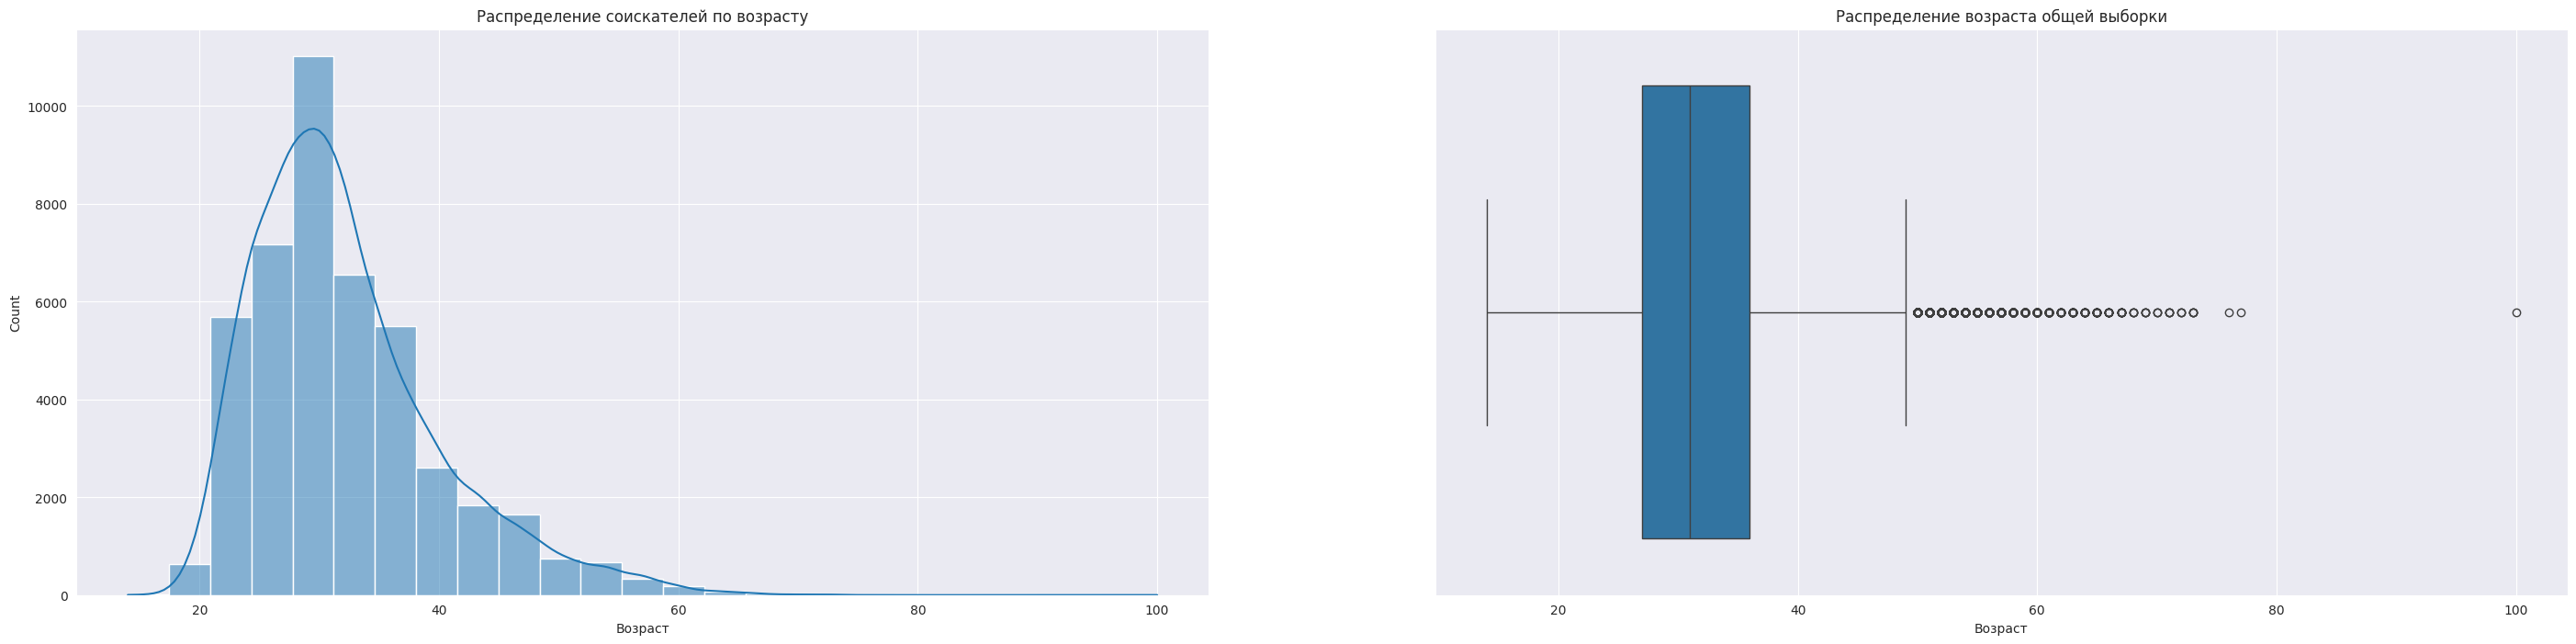

In [260]:
hh_data = hh_data.sort_values(by='Возраст')

print("Мода возраста = ", hh_data['Возраст'].mode()[0])
print("Медиана возраста = ", hh_data['Возраст'].median())
print("Средний возраст = ", round(hh_data['Возраст'].mean()))
print("25% процентиль возраста = ", hh_data['Возраст'].quantile(0.25))
print("75% процентиль возраста = ", hh_data['Возраст'].quantile(0.75))
print("95% процентиль возраста = ", hh_data['Возраст'].quantile(0.95))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 8))
histplot = sns.histplot(
    data=hh_data,
    x='Возраст',
    bins=25,
    kde=True,
    ax=axes[0]
)
histplot.set_title('Распределение соискателей по возрасту')
boxplot = sns.boxplot(data=hh_data, x='Возраст', ax=axes[1])
boxplot.set_title('Распределение возраста общей выборки')
boxplot.figure.savefig("visual/ages.png");


Мода возраста равна 30. Из приведнных вышес статистических данных видно нормальное распределение возраста с пиком в районе 31 года, и более плавным спадом к 60 годам. Примерный возраст соискателей находится в районе 27-36 лет. Аномалии обнаружены, от 48 лет до 70 соискатели обнаружены, но очень редки, и считаются таковыми, но есть соискатели 70+ которые точно считаются аномалиями.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Мода опыта =  1.0
Медиана опыта =  100
Средний опыта =  114
25% процентиль опыта =  57
75% процентиль опыта =  154
95% процентиль опыта =  264


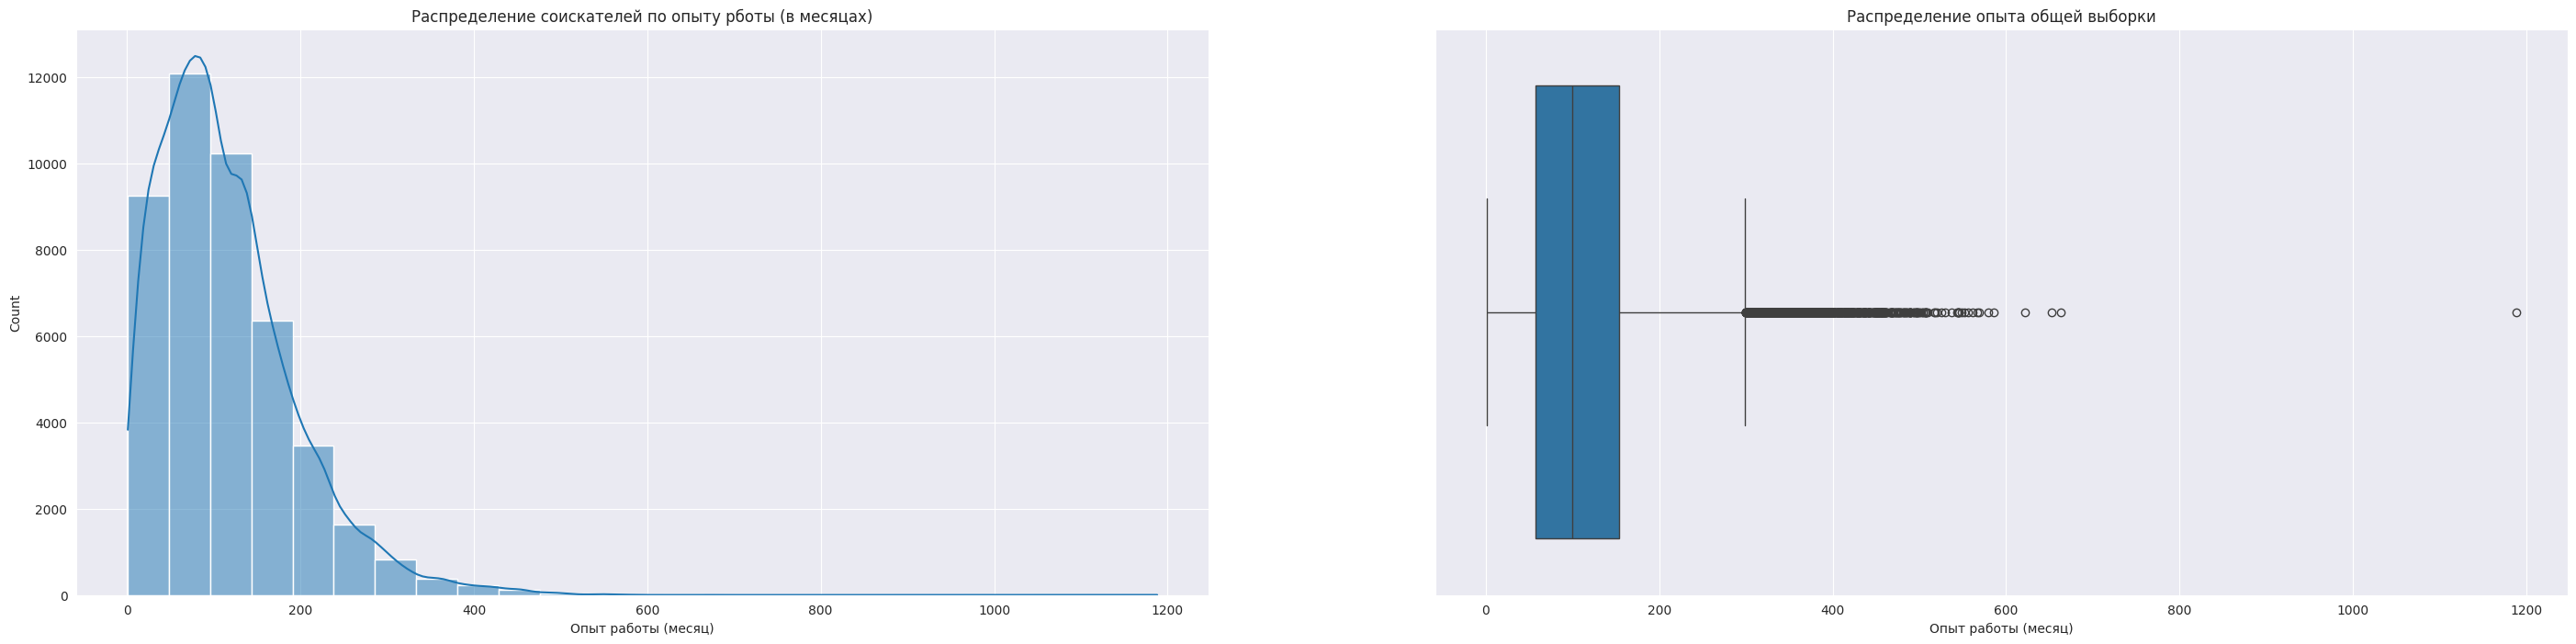

In [261]:
print("Мода опыта = ", hh_data['Опыт работы (месяц)'].mode()[0])
print("Медиана опыта = ", round(hh_data['Опыт работы (месяц)'].median()))
print("Средний опыта = ", round(hh_data['Опыт работы (месяц)'].mean()))
print("25% процентиль опыта = ", round(hh_data['Опыт работы (месяц)'].quantile(0.25)))
print("75% процентиль опыта = ", round(hh_data['Опыт работы (месяц)'].quantile(0.75)))
print("95% процентиль опыта = ", round(hh_data['Опыт работы (месяц)'].quantile(0.95)))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 8))
histplot = sns.histplot(
    data=hh_data,
    x='Опыт работы (месяц)',
    bins=25,
    kde=True,
    ax=axes[0]
)
histplot.set_title('Распределение соискателей по опыту рботы (в месяцах)')
boxplot = sns.boxplot(data=hh_data, x='Опыт работы (месяц)', ax=axes[1])
boxplot.set_title('Распределение опыта общей выборки');
boxplot.figure.savefig("visual/experience.png");

Мода распределени по месяцам равна 1, хотя если пересчитать/перевести месяцы в года, то мода в годах будет равна 6, думаю стоит иметь в виду.
Интервал опыта находится в районе  4.5 лет (56 месяцев) до 12.5 лет (154 месяца). (Если перевести месяцы в года различия незначительны)
Найден один соискатель с опытом работы 99 лет, возрастом 48 лет, аномалия очевидна. 
Вычисление аномалий можно провести как минимум формулой  (Возраст - 18 > Опыт работы в годах)

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


Мода ЗП =  50000
Медиана ЗП =  59019
Средний ЗП =  76534
25% процентиль ЗП =  37082
75% процентиль ЗП =  95000
99.5% процентиль ЗП =  350000
Максимум ЗП =  24304876


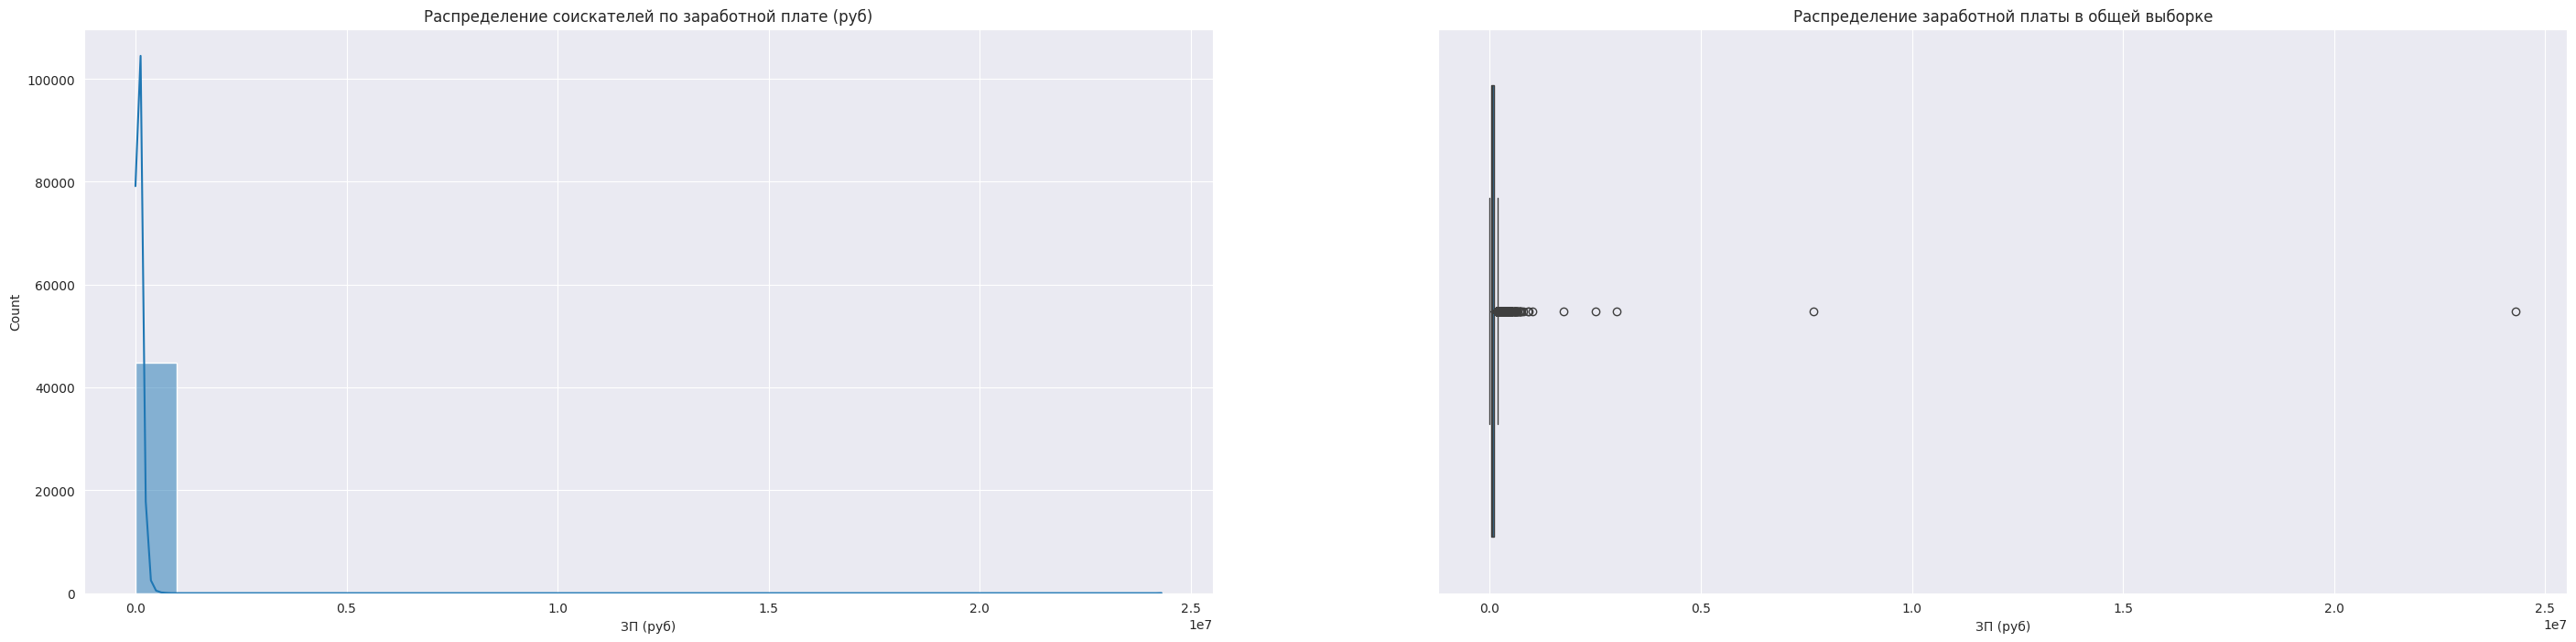

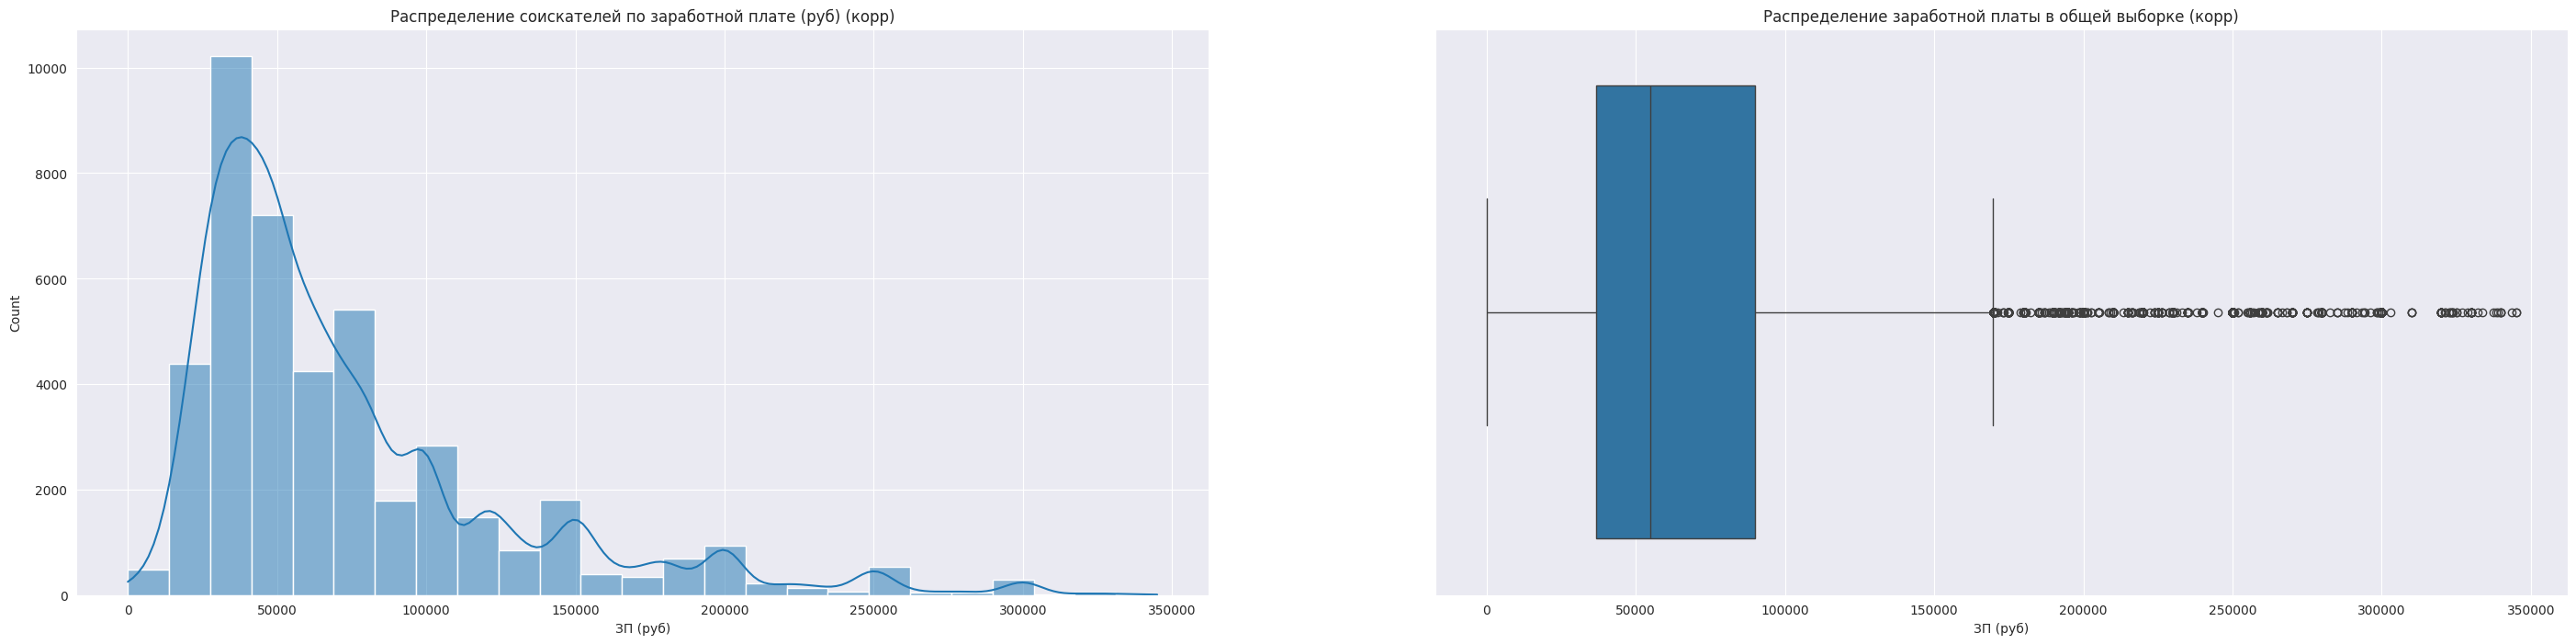

In [262]:
hh_data = hh_data.sort_values(by='ЗП (руб)')

print("Мода ЗП = ", hh_data['ЗП (руб)'].mode()[0])
print("Медиана ЗП = ", round(hh_data['ЗП (руб)'].median()))
print("Средний ЗП = ", round(hh_data['ЗП (руб)'].mean()))
print("25% процентиль ЗП = ", round(hh_data['ЗП (руб)'].quantile(0.25)))
print("75% процентиль ЗП = ", round(hh_data['ЗП (руб)'].quantile(0.75)))
print("99.5% процентиль ЗП = ", round(hh_data['ЗП (руб)'].quantile(0.995)))
print("Максимум ЗП = ", round(hh_data['ЗП (руб)'].max()))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 8))
histplot = sns.histplot(
    data=hh_data,
    x='ЗП (руб)',
    bins=25,
    kde=True,
    ax=axes[0]
)
histplot.set_title('Распределение соискателей по заработной плате (руб)')
boxplot = sns.boxplot(data=hh_data, x='ЗП (руб)', ax=axes[1])
boxplot.set_title('Распределение заработной платы в общей выборке')

hh_data_cor = hh_data[hh_data['ЗП (руб)'] < round(hh_data['ЗП (руб)'].quantile(0.995))]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 8))
histplot = sns.histplot(
    data=hh_data_cor,
    x='ЗП (руб)',
    bins=25,
    kde=True,
    ax=axes[0]
)
histplot.set_title('Распределение соискателей по заработной плате (руб) (корр)')
boxplot = sns.boxplot(data=hh_data_cor, x='ЗП (руб)', ax=axes[1])
boxplot.set_title('Распределение заработной платы в общей выборке (корр)')
boxplot.figure.savefig("visual/salary.png");

Мода ЗП находится в районе 50 тыс. руб.
Основной диапазон ЗП от 37 тыс. до 95 тыс. руб.
Аномальные ЗП мешают выводу наглядного графика, в связи с чем пришлось отсеять ЗП выше 99.5 процентиля (350 тр.) 
На графике заметры "пеньки" связаны они с "круглыми суммами".

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

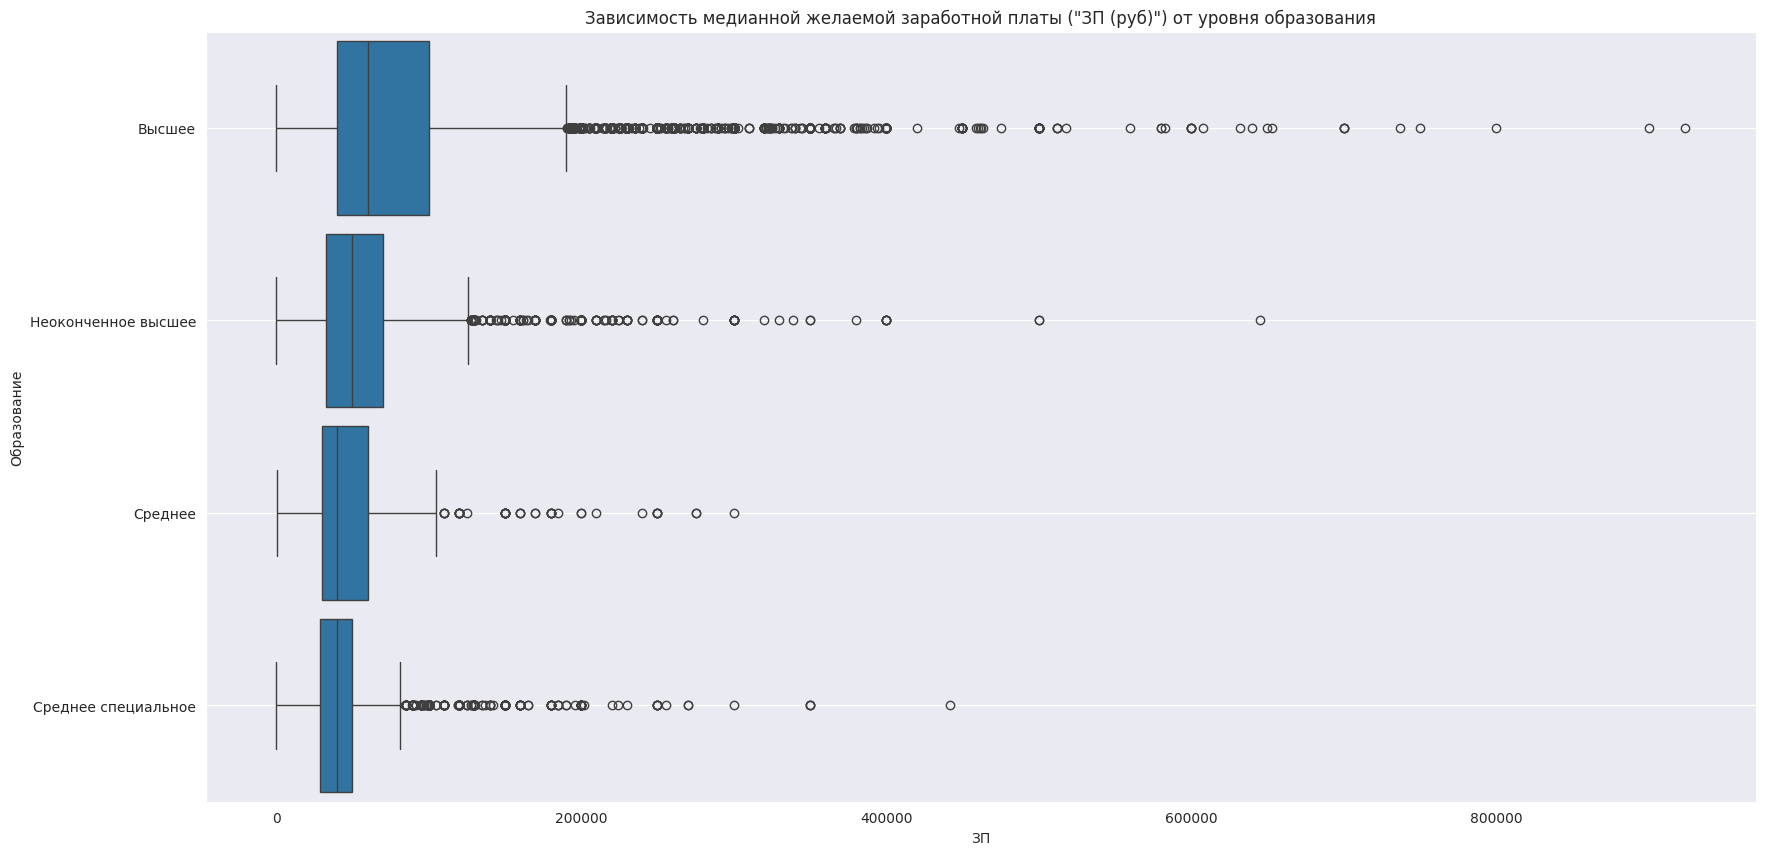

In [263]:
hh_data_cor = hh_data[hh_data['ЗП (руб)'] < 1000000]

fig = plt.figure(figsize=(20, 10))
boxplot = sns.boxplot(
    data=hh_data_cor,
    y='Образование',
    x='ЗП (руб)',
    orient='h',
    width=0.9
)
boxplot.set_title('Зависимость медианной желаемой заработной платы ("ЗП (руб)") от уровня образования')
boxplot.set_xlabel('ЗП')
boxplot.set_ylabel('Образование')
boxplot.grid()
boxplot.figure.savefig("visual/salary_education.png");

Лучшие ожидания по ЗП замечены для соискателей с Высшим образованим, а наихудшее у Среднего специального.
Определенно, уровень образования влияет на ожидания по ЗП. Связь очевидна.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

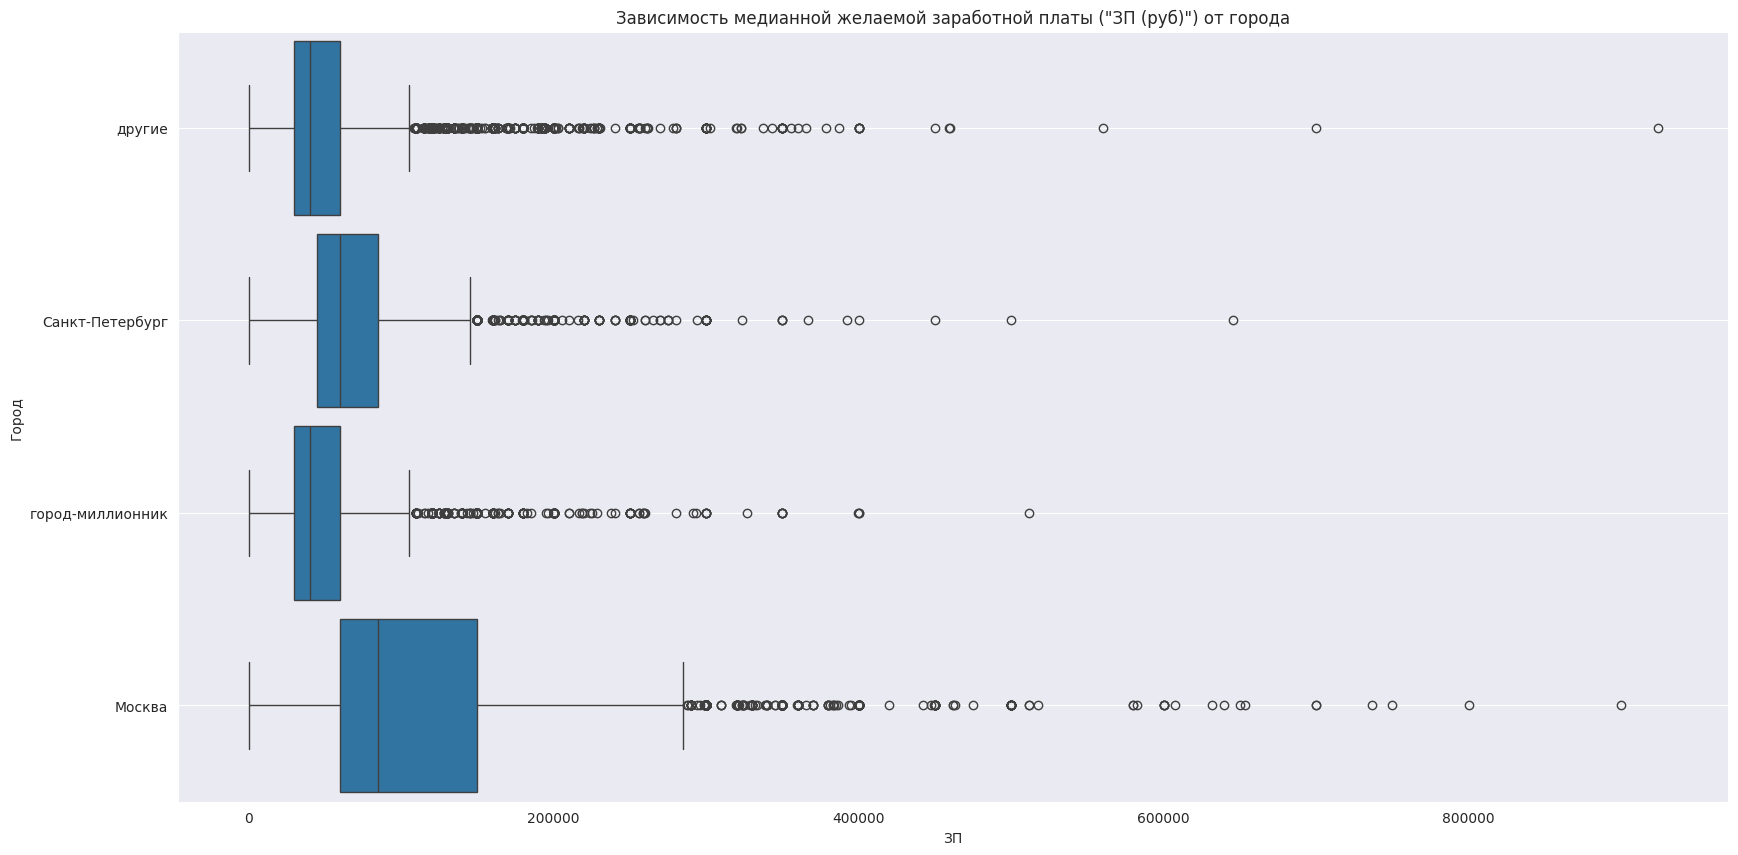

In [264]:
hh_data_cor = hh_data[hh_data['ЗП (руб)'] < 1000000]

fig = plt.figure(figsize=(20, 10))
boxplot = sns.boxplot(
    data=hh_data_cor,
    y='Город',
    x='ЗП (руб)',
    orient='h',
    width=0.9
)
boxplot.set_title('Зависимость медианной желаемой заработной платы ("ЗП (руб)") от города')
boxplot.set_xlabel('ЗП')
boxplot.set_ylabel('Город')
boxplot.grid()
boxplot.figure.savefig("visual/salary_city.png");

Очевидно: Самые большие ЗП в 2-х основных городах страны, Москва, Санкт-Петербург.
Ожидания в других городах близки друг к другу, возможно связано с тем что "Другие" включают города-саттелиты, поэтому соискатель находится в Другом городе но ЗП ставит достаточно высокую. Пример: Мытищи, но ЗП города Москвы. 

Определенно если город Москва или Санкт-Петербург ожидания по ЗП будут высокими, если город другой или город-миллионник то отрезок ЗП будет ниже.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

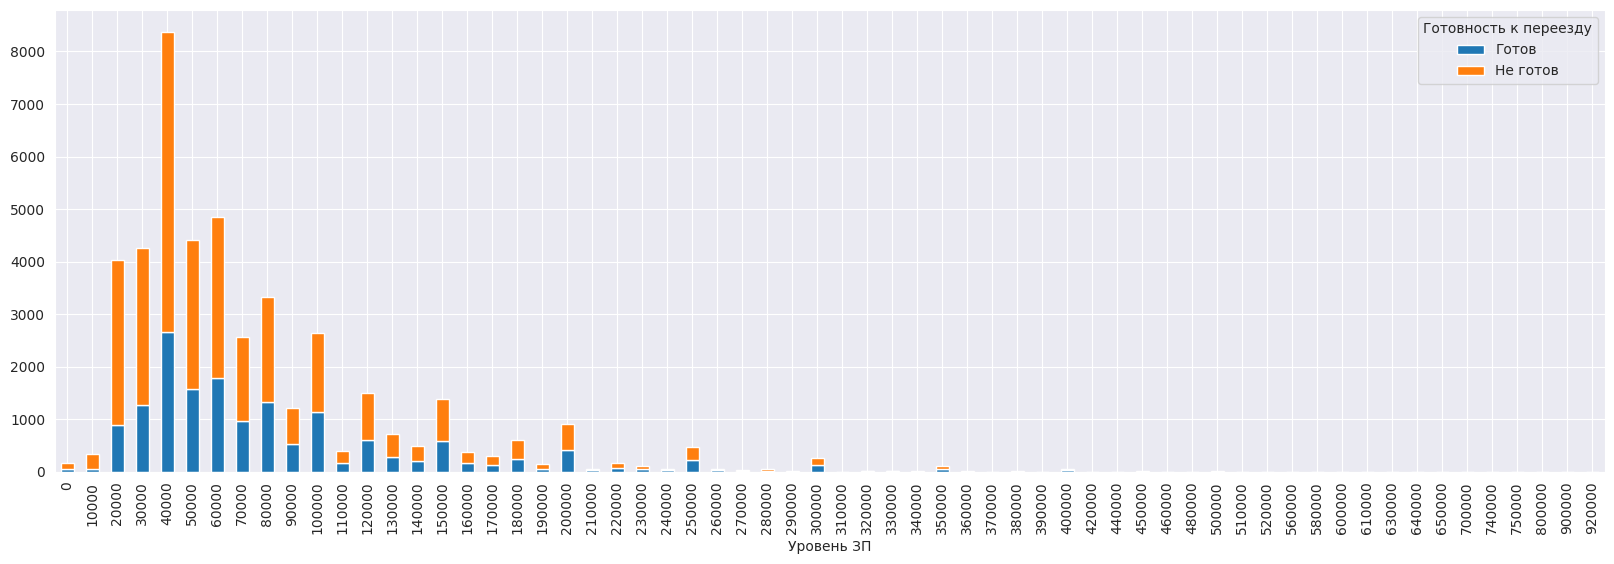

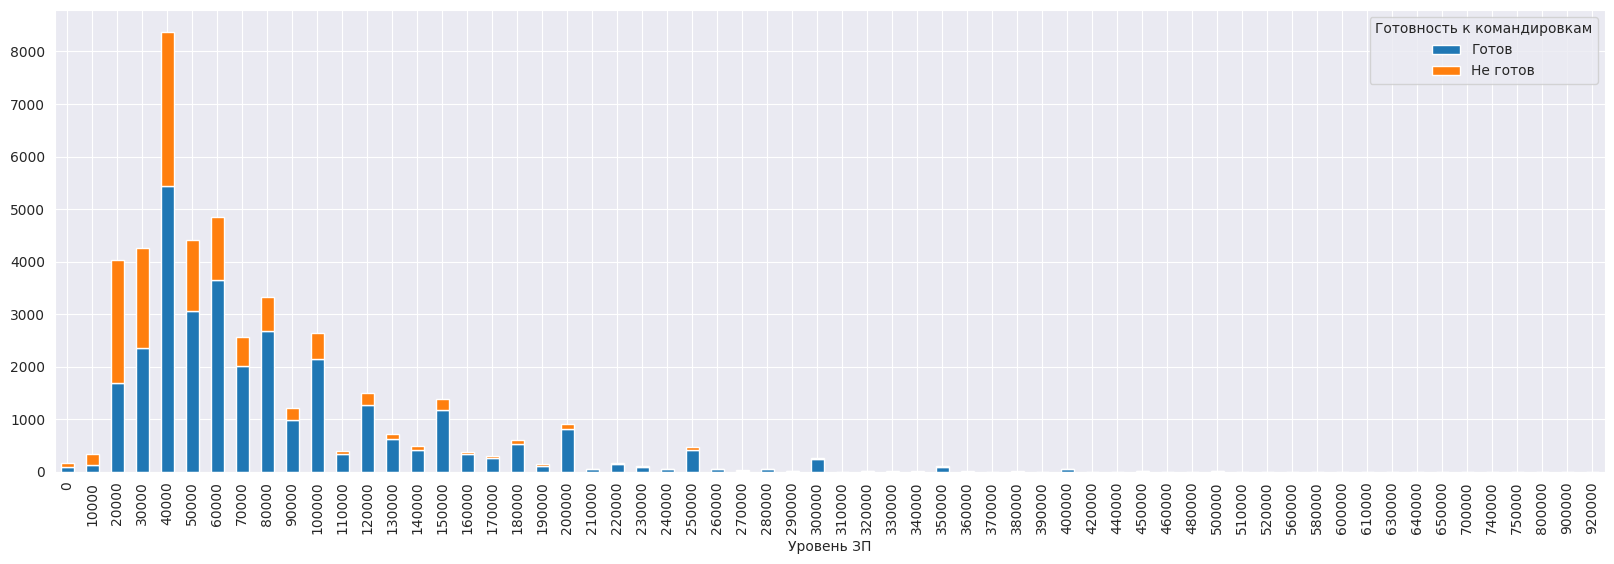

In [265]:
hh_data_cor = hh_data[['ЗП (руб)', 'Готовность к переезду', 'Готовность к командировкам']].copy()
hh_data_cor = hh_data_cor[hh_data_cor['ЗП (руб)'] < 1000000]
hh_data_cor['Уровень ЗП'] = hh_data_cor['ЗП (руб)'].apply(lambda x: round(x / 10000) * 10000)
hh_data_cor['Готовность к переезду'] = hh_data_cor['Готовность к переезду'].apply(
    lambda x: 'Готов' if x else 'Не готов')
hh_data_cor = hh_data_cor.groupby(['Уровень ЗП', 'Готовность к переезду']).agg(count=('Готовность к переезду', 'size'))
boxplot = hh_data_cor.unstack().plot(kind='bar', y='count', figsize=(20, 6), stacked=True)
boxplot.figure.savefig("visual/salary_relocate.png")

hh_data_cor = hh_data[['ЗП (руб)', 'Готовность к переезду', 'Готовность к командировкам']].copy()
hh_data_cor = hh_data_cor[hh_data_cor['ЗП (руб)'] < 1000000]
hh_data_cor['Уровень ЗП'] = hh_data_cor['ЗП (руб)'].apply(lambda x: round(x / 10000) * 10000)
hh_data_cor['Готовность к командировкам'] = hh_data_cor['Готовность к командировкам'].apply(
    lambda x: 'Готов' if x else 'Не готов')
hh_data_cor = hh_data_cor.groupby(['Уровень ЗП', 'Готовность к командировкам']).agg(
    count=('Готовность к командировкам', 'size'))
boxplot = hh_data_cor.unstack().plot(kind='bar', y='count', figsize=(20, 6), stacked=True)
boxplot.figure.savefig("visual/salary_trip.png");

В большинство соискателей не готовы к переезду, процент готовых к переезду (относительно всех в данном диапазоне) увеличивается с ЗП > 100тр.
Но  командировкам большинство соискателей готовы, не зависимо от диапазона ЗП.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

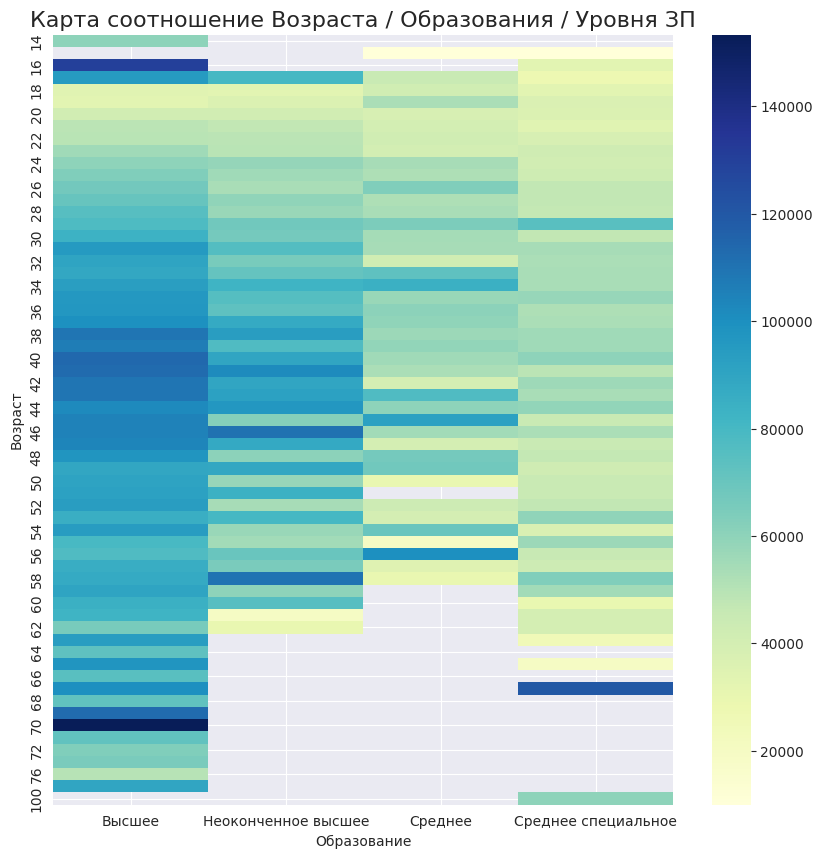

In [266]:
hh_data_cor = hh_data[['ЗП (руб)', 'Возраст', 'Образование']].copy()
hh_data_cor['ЗП (руб)'] = hh_data_cor['ЗП (руб)'].apply(lambda x: math.ceil(x / 10000) * 10000)
hh_data_cor = hh_data_cor.groupby(['Возраст', 'Образование'], observed=True).agg(
    mean=('ЗП (руб)', 'mean')).reset_index()

hh_data_cor = hh_data_cor.pivot(index='Возраст', columns='Образование', values='mean')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
heatmap = sns.heatmap(data=hh_data_cor, cmap='YlGnBu', ax=axes)
heatmap.set_title('Карта соотношение Возраста / Образования / Уровня ЗП', fontsize=16)

heatmap.figure.savefig("visual/heatmap_age_edu_sal.png");

Замечны вбросы по возрасту <18 лет, как и на предыдущих графиках видно значительное потепление у соискателей с высшим образованием. Так же Высшее образование не может быть у соискателей моложе 22 лет. Распределение достаточно равномерное, с незначительными колебаниями. Некоторые "вбросы" можно сгладить на этапе очистки данных.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

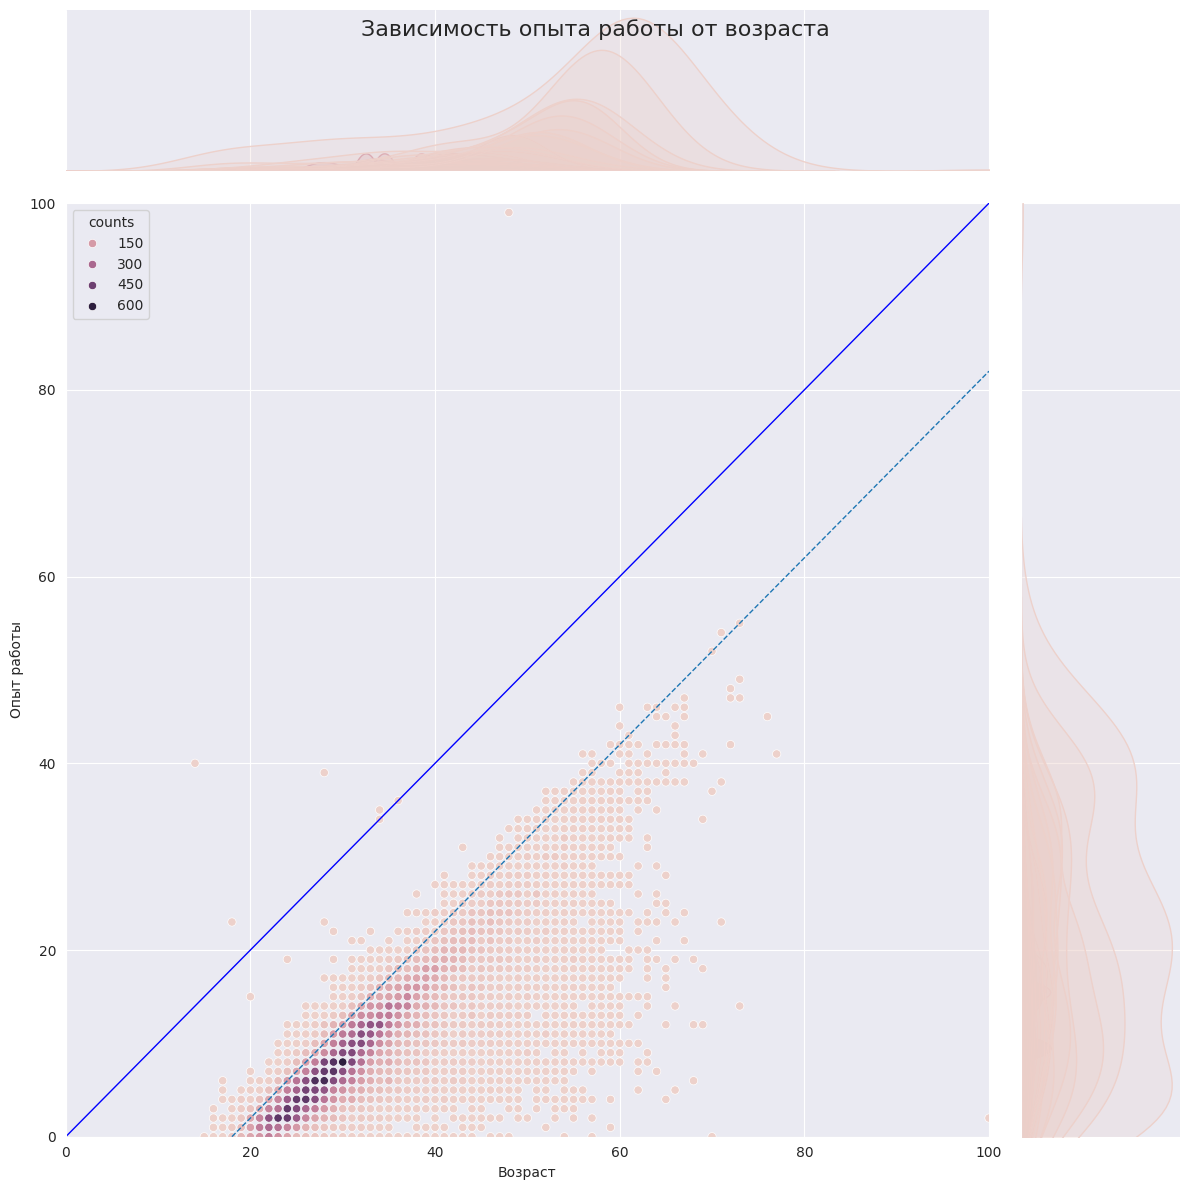

In [267]:
hh_data_cor = hh_data[['Опыт работы (месяц)', 'Возраст']].copy()
hh_data_cor['Опыт работы'] = hh_data_cor['Опыт работы (месяц)'].apply(
    lambda x: round(x / 12) if math.isnan(x) == False else 0)
hh_data_cor = hh_data_cor.groupby(['Опыт работы', 'Возраст'], observed=True).size().reset_index(name='counts')

jointplot = sns.jointplot(
    data=hh_data_cor,
    x='Возраст',
    y='Опыт работы',
    hue='counts',
    xlim=(0, 100),
    ylim=(0, 100),
    height=12,
)
jointplot.fig.suptitle('Зависимость опыта работы от возраста', fontsize=16)
jointplot.ax_joint.plot([0, 100], [0, 100], 'b-', linewidth=1)
jointplot.ax_joint.plot([18, 100], [0, 82], linewidth=1, linestyle='--')
jointplot.figure.savefig("visual/exp_age.png");

Так же добавил линию от 18 лет, которая показывает что у соискателя (Возраст - 18 < Опыт работы) что говорит о том что он работал несовершеннолетним? странно

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


''

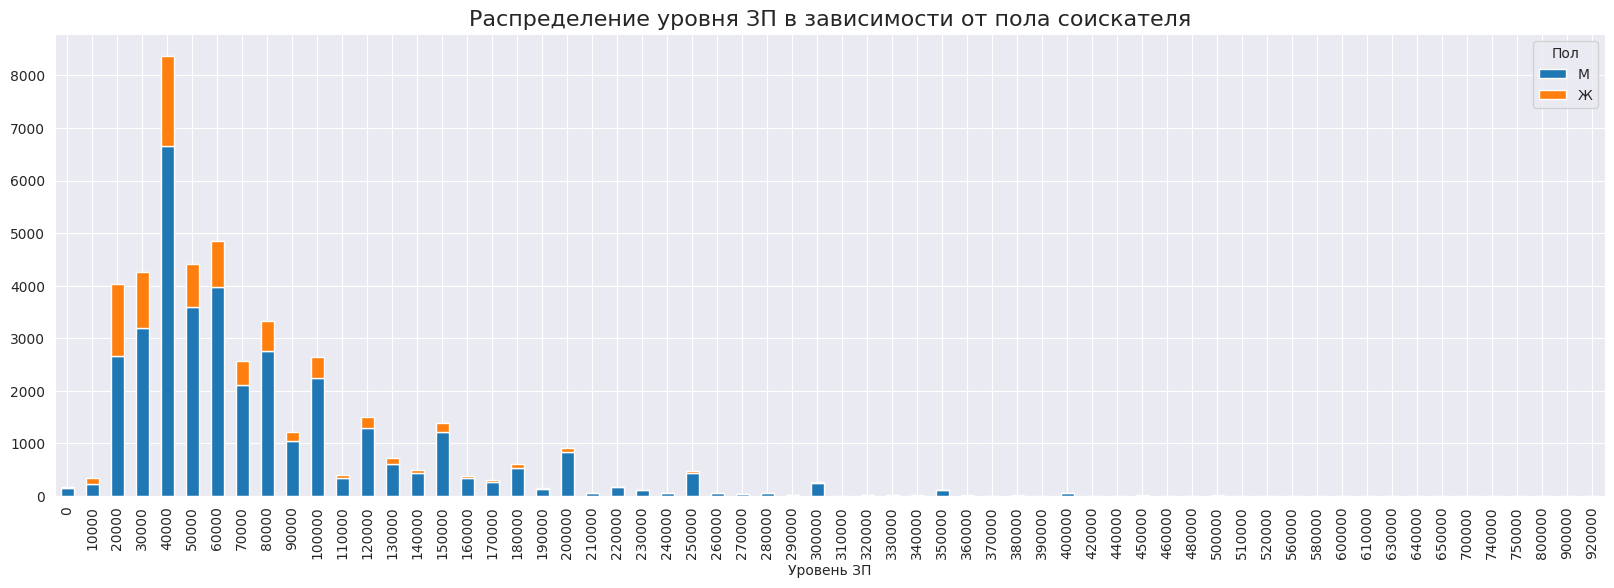

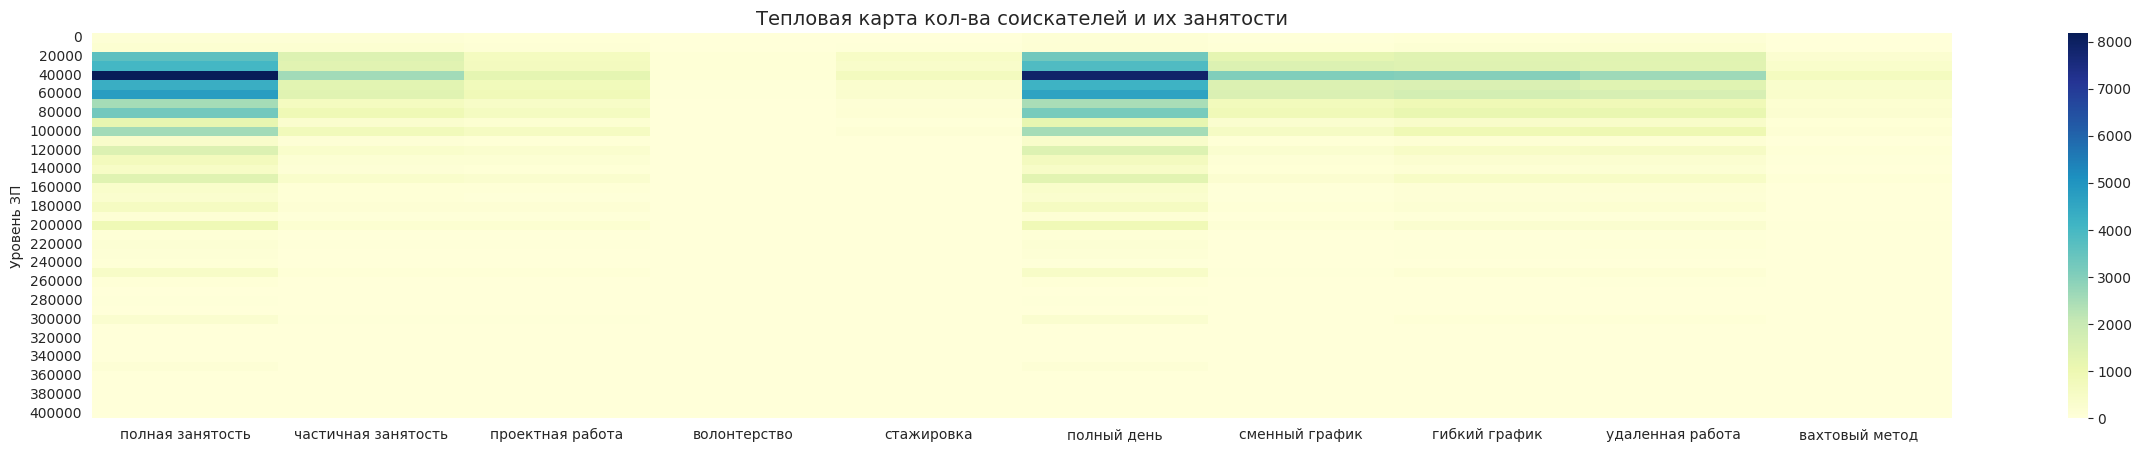

In [268]:
hh_data_cor = hh_data[['ЗП (руб)', 'Пол']].copy()
hh_data_cor = hh_data_cor[hh_data_cor['ЗП (руб)'] < 1000000]
hh_data_cor['Уровень ЗП'] = hh_data_cor['ЗП (руб)'].apply(lambda x: round(x / 10000) * 10000)
hh_data_cor = hh_data_cor.groupby(['Уровень ЗП', 'Пол'], observed=True).agg(count=('Пол', 'size'))
plot = hh_data_cor.unstack().plot(kind='bar', y='count', figsize=(20, 6), stacked=True)
plot.set_title('Распределение уровня ЗП в зависимости от пола соискателя', fontsize=16)
plot.figure.savefig("visual/sal_gen.png")

hh_data_cor = hh_data[
    ['ЗП (руб)', 'полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка',
     'полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']].copy()
hh_data_cor = hh_data_cor[hh_data_cor['ЗП (руб)'] < 400000]
hh_data_cor['Уровень ЗП'] = hh_data_cor['ЗП (руб)'].apply(lambda x: round(x / 10000) * 10000)
hh_data_cor = hh_data_cor.drop('ЗП (руб)', axis=1)
hh_data_cor = hh_data_cor.groupby(['Уровень ЗП'], observed=True).sum()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 5))
heatmap = sns.heatmap(data=hh_data_cor, cmap='YlGnBu', ax=axes)
heatmap.set_title('Тепловая карта кол-ва соискателей и их занятости', fontsize=14)
heatmap.figure.savefig("visual/count_zan.png")
;

На графике "Распределение уровня ЗП в зависимости от пола соискателя" видно что большинство соискателй мужского пола. Соискатели женского пола в основном встречаются на вакансиях до 200тр. включительно.
На графике "Тепловая карта кол-ва соискателей и их занятости" видо что большенство соискателей ищут работа на полную занятость/полный день. Волонтерство практически отсутствует. Удаленная работа не доминирует в зарплатах 120т.р.+ (сфера IT). (но это БД доковидная) 

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [269]:
dupl_columns = list(hh_data.columns)
mask = hh_data.duplicated(subset=dupl_columns)

hh_data_duplicates = hh_data[mask]
print(f'Результирующее число записей: {hh_data.shape[0]}')
print(f'Число найденных дубликатов: {hh_data_duplicates.shape[0]}')
hh_data = hh_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_data.shape[0]}')

Результирующее число записей: 44744
Число найденных дубликатов: 158
Результирующее число записей: 44586


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [270]:
hh_data.isnull().sum()

ЗП                                   0
Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [271]:
print(f'Число всех записей: {hh_data.shape[0]}')
hh_data = hh_data.dropna(how='all', subset=["Последнее/нынешнее место работы", "Последняя/нынешняя должность"])
print(f'Число записей после очистки: {hh_data.shape[0]}')

values = {
    'Опыт работы (месяц)': hh_data['Опыт работы (месяц)'].median(),
}
hh_data = hh_data.fillna(values)
hh_data.isnull().sum()

Число всех записей: 44586
Число записей после очистки: 44585


ЗП                                 0
Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       1
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
полная занятость                   0
частичная занятость                0
проектная работа                   0
волонтерство                       0
стажировка                         0
полный день                        0
сменный график                     0
гибкий график                      0
удаленная работа                   0
вахтовый метод                     0
ЗП (руб)                           0
dtype: int64

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [272]:
print(f'Число записей до очистки: {hh_data.shape[0]}')
hh_data = hh_data[(hh_data['ЗП (руб)'] >= 1000) & (hh_data['ЗП (руб)'] <= 1000000)]
print(f'Число записей после очистки: {hh_data.shape[0]}')

Число записей до очистки: 44585
Число записей после очистки: 44496


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [273]:
print(f'Число записей до очистки: {hh_data.shape[0]}')
hh_data = hh_data[hh_data['Возраст'] > round(hh_data['Опыт работы (месяц)'] / 12)]
print(f'Число записей после очистки: {hh_data.shape[0]}')

Число записей до очистки: 44496
Число записей после очистки: 44489


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число всех записей: 44489
Число очищенных записей: 44486
[ 15 100]


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
32950,2000 руб.,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09 16:02:00,Не указано,Среднее специальное,M,15,3.0,...,False,False,False,False,True,False,False,False,False,2000
31137,10000 руб.,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06 09:13:00,Не указано,Среднее,M,15,2.0,...,True,False,False,False,False,True,True,True,False,10000
33654,60000 руб.,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19 23:27:00,Не указано,Среднее специальное,M,100,30.0,...,True,True,False,True,True,False,True,True,False,60000


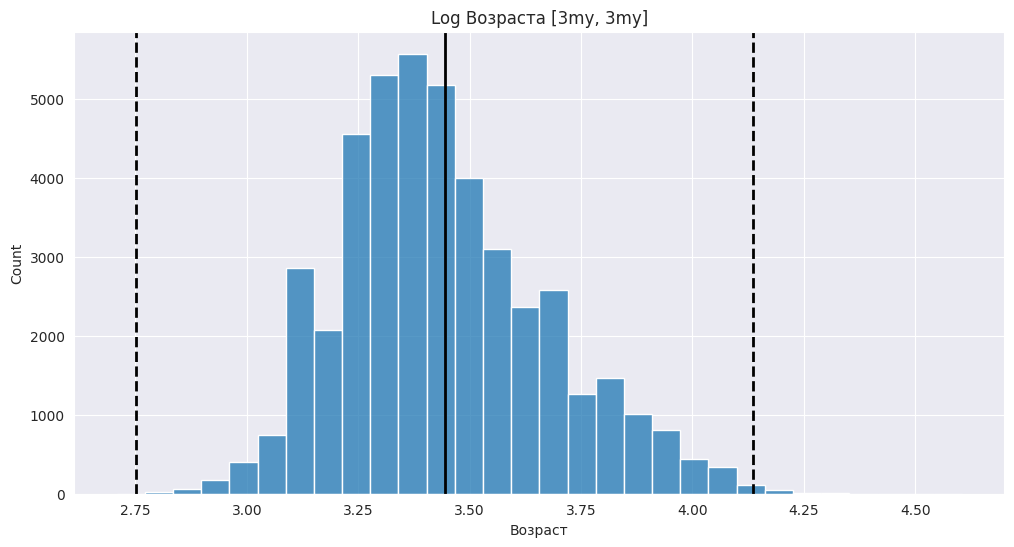

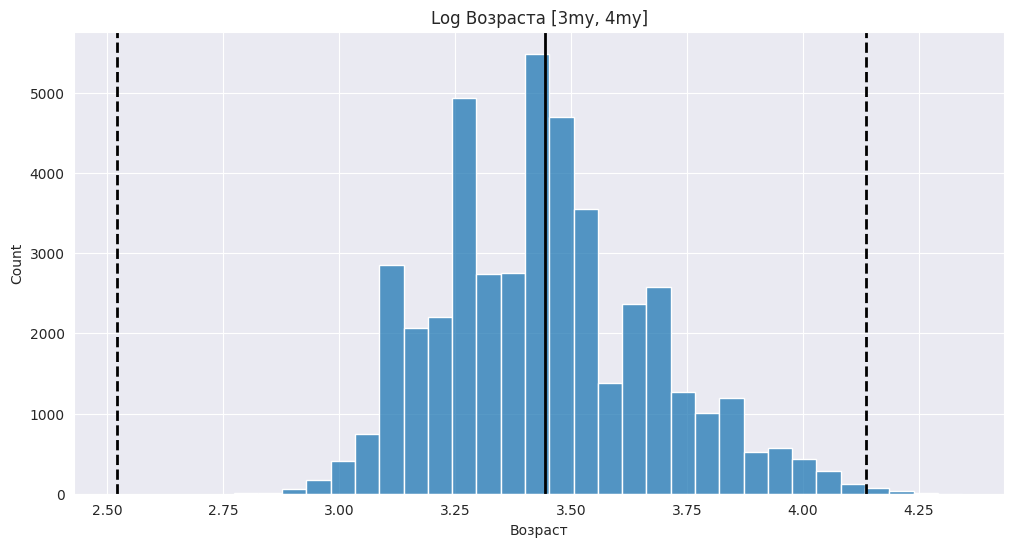

In [274]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
log_age = np.log(hh_data['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Возраста [3my, 3my]')
histplot.figure.savefig("visual/log_age_3_3.png")


def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score_mod(hh_data, 'Возраст', log_scale=True, left=3, right=4)

print(f'Число всех записей: {hh_data.shape[0]}')
print(f'Число очищенных записей: {cleaned.shape[0]}')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
log_age = np.log(cleaned['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Возраста [3my, 4my]')
histplot.figure.savefig("visual/log_age_3_4.png")

print(outliers['Возраст'].unique())
outliers

График логарифмов смещен в "молодую" сторону, есть выход за 3-ю сигму.
После очистки пропали записи со следующими возрастами  [ 15 100]
Возможно есть смысл подвинуть выборку, удалить всех до 18-ти лет и не трогать до 65
 